# Experiment 1 : Grow of stables attractors fields in Aleatory CBN

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("outputs/exp1_data_modified_8_512_1000/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges', 'step', 'method',
       'execution_time', 'n_local_attractors', 'n_pair_attractors'],
      dtype='object')

In [2]:
df

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,step,method,execution_time,n_local_attractors,n_pair_attractors
0,1,8,5,2,2,2,8,1,1,0.476111,24.0,NaN
1,1,8,5,2,2,2,8,1,2,0.237575,24.0,NaN
2,1,8,5,2,2,2,8,1,3,0.202071,24.0,NaN
3,1,8,5,2,2,2,8,2,1,0.000475,NaN,22.0
4,1,8,5,2,2,2,8,2,2,0.109814,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1000,512,5,2,2,2,512,1,2,3.640097,3648.0,NaN
41996,1000,512,5,2,2,2,512,1,3,3.746411,3648.0,NaN
41997,1000,512,5,2,2,2,512,2,1,0.350386,NaN,24944.0
41998,1000,512,5,2,2,2,512,2,2,7.192999,NaN,24944.0


## General Statistics

### Statistics

In [3]:
# Compute mean execution times grouped by method, step, and number of local networks
mean_times = df.groupby(['step', 'method', 'n_local_networks'])['execution_time'].mean().reset_index()

# Sort the values before pivoting
mean_times = mean_times.sort_values(by=['step', 'method'])

# Pivot the table to have columns for each n_local_networks
table = mean_times.pivot(index=['step', 'method'], columns='n_local_networks', values='execution_time')

# Print the table
table

n_local_networks       8         16        32        64         128  \
step method                                                           
1    1            0.561233  1.374824  2.898737  5.956464  12.122763   
     2            0.345476  0.382389  0.461362  0.659285   1.054086   
     3            0.348333  0.382129  0.426414  0.616804   1.022329   
2    1            0.000581  0.001134  0.002608  0.007503   0.027883   
     2            0.215941  0.261760  0.422097  1.027376   2.023593   
     3            0.213166  0.269759  0.432186  1.170750   2.275160   

n_local_networks        256        512  
step method                             
1    1            24.500574  49.151019  
     2             1.784813   3.294369  
     3             1.849789   3.530454  
2    1             0.099058   0.375389  
     2             4.135839   9.265697  
     3             4.660535   9.460387

In [4]:
import pandas as pd

# Calcular tiempos medios de ejecución agrupados por step, method y n_local_networks
mean_times = df.groupby(['step', 'method', 'n_local_networks'])['execution_time'].mean().reset_index()

# Ordenar y pivotar la tabla
mean_times = mean_times.sort_values(by=['step', 'method'])
table = mean_times.pivot(index=['step', 'method'], columns='n_local_networks', values='execution_time')

# Convertir el índice en columnas y renombrar para que aparezca primero "Stage" y luego "Method"
table_reset = table.reset_index().rename(columns={'step': 'Stage', 'method': 'Method'})

# Lista de columnas: las dos primeras serán "Stage" y "Method", el resto corresponden a n_local_networks
cols = table_reset.columns.tolist()
n_bool_cols = len(cols) - 2

# Definir el formato de columnas para LaTeX: primera columna centrada (c), segunda alineada a la izquierda (l) y el resto a la derecha (r)
col_format = "c|l|" + "r|" * (n_bool_cols)
col_format = col_format.rstrip("|")

latex_str = ""
latex_str += "\\begin{tabular}{" + col_format + "}\n"
latex_str += "\\hline\n"
# Primera fila: encabezado para las columnas de redes locales
latex_str += " &  & \\multicolumn{" + str(n_bool_cols) + "}{c}{\\textbf{\\# of Boolean Networks}} \\\\ \\hline\n"
# Segunda fila: cabecera de columnas, ahora con "Stage" y "Method"
latex_str += "{\\bf Stage} & {\\bf Method} "
for col in cols[2:]:
    latex_str += "& {\\bf " + str(col) + "} "
latex_str += "\\\\ \\hline\n"

# Agrupar por Stage para combinar las celdas de esa columna
grouped = table_reset.groupby("Stage")
for stage, group in grouped:
    n_rows = group.shape[0]
    first = True
    for _, row in group.iterrows():
        if first:
            # Formatear el texto: "Step X" en lugar del número
            stage_cell = f"\\multirow{{{n_rows}}}{{*}}{{Step {int(stage)}}}"
            first = False
        else:
            stage_cell = ""
        row_line = f"{stage_cell} & {row['Method']}"
        # Recorrer las columnas de redes locales
        for col in cols[2:]:
            val = row[col]
            if pd.isna(val):
                cell = "----s"
            else:
                cell = f"{val:.4f}s"
            row_line += " & " + cell
        row_line += " \\\\ \\hline\n"
        latex_str += row_line

latex_str += "\\end{tabular}"
print(latex_str)


\begin{tabular}{c|l|r|r|r|r|r|r|r}
\hline
 &  & \multicolumn{7}{c}{\textbf{\# of Boolean Networks}} \\ \hline
{\bf Stage} & {\bf Method} & {\bf 8} & {\bf 16} & {\bf 32} & {\bf 64} & {\bf 128} & {\bf 256} & {\bf 512} \\ \hline
\multirow{3}{*}{Step 1} & 1.0 & 0.5612s & 1.3748s & 2.8987s & 5.9565s & 12.1228s & 24.5006s & 49.1510s \\ \hline
 & 2.0 & 0.3455s & 0.3824s & 0.4614s & 0.6593s & 1.0541s & 1.7848s & 3.2944s \\ \hline
 & 3.0 & 0.3483s & 0.3821s & 0.4264s & 0.6168s & 1.0223s & 1.8498s & 3.5305s \\ \hline
\multirow{3}{*}{Step 2} & 1.0 & 0.0006s & 0.0011s & 0.0026s & 0.0075s & 0.0279s & 0.0991s & 0.3754s \\ \hline
 & 2.0 & 0.2159s & 0.2618s & 0.4221s & 1.0274s & 2.0236s & 4.1358s & 9.2657s \\ \hline
 & 3.0 & 0.2132s & 0.2698s & 0.4322s & 1.1707s & 2.2752s & 4.6605s & 9.4604s \\ \hline
\end{tabular}


### Boxplots and Violin Plots

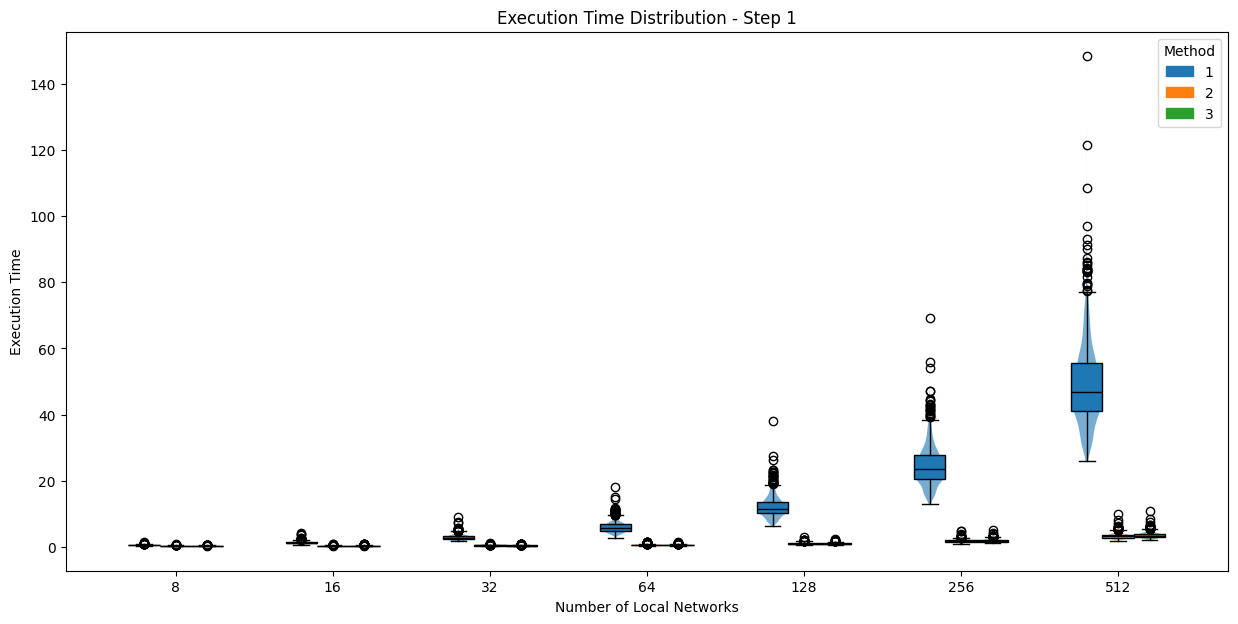

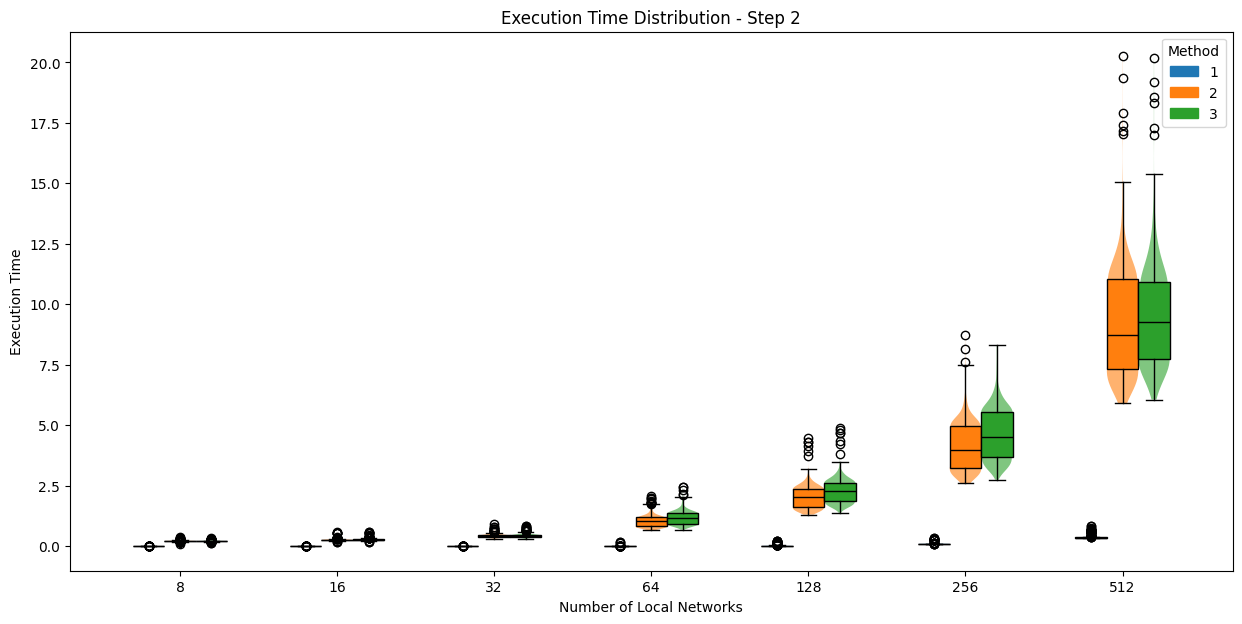

In [5]:
# Unique values for steps and methods
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_local_networks_values = sorted(df['n_local_networks'].unique())

# Plot boxplots and violin plots
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_local_networks_values))  # X positions
    width = 0.2  # Width of each box/violin

    # Boxplots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna() for n in n_local_networks_values]
        ax.boxplot(data, positions=positions + i * width - width, widths=width, patch_artist=True,
                   boxprops=dict(facecolor=f"C{i}"), medianprops=dict(color='black'))

    # Violin plots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna().values for n in n_local_networks_values]
        parts = ax.violinplot(data, positions=positions + i * width - width, widths=width, showmeans=False,
                              showextrema=False, showmedians=False)
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_local_networks_values)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend([plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))], methods, title="Method")

    # Para el paso 3, usar escala logarítmica en el eje y
    if step == 3:
        ax.set_yscale('log')

    plt.show()


### Histograms

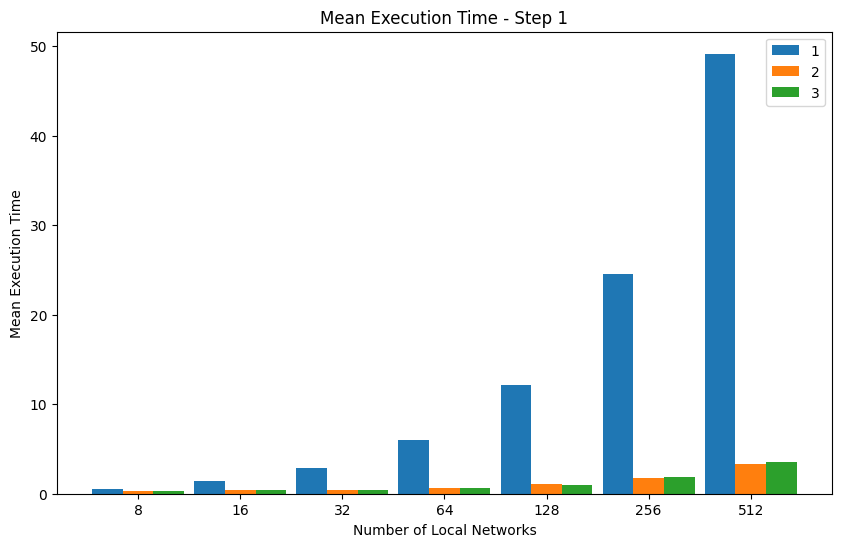

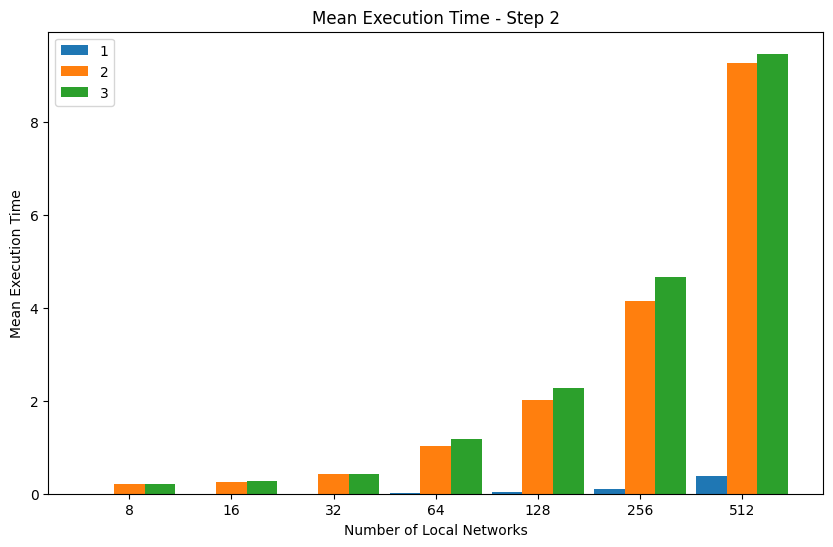

In [6]:
# Create boxplots and violin plots for execution times grouped by step and method
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_local_networks = sorted(df['n_local_networks'].unique())

# Create histograms for mean execution times per step
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Width of each bar
    positions = np.arange(len(unique_n_local_networks))

    for i, method in enumerate(unique_methods):
        means = [data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)]['execution_time'].values[0] if not data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)].empty else 0 for n in unique_n_local_networks]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_local_networks)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()
